# Joint Constraints
In this notebook, after having computed $\chi_r^2$ surfaces for both the GW method ($z-d_L$ relation) and the long sgrb data ($E_\text{peak}-E_\text{iso}$ relation). We will now sum both surfaces in other to obtains a combined constraint of the $\Omega_m, \Omega_\Lambda$ cosmological parameters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

GW_CHI_SQUARE = np.load('GW/GW_chi_surface.npy')
GW_MASK = np.load('GW/GW_mask.npy')

gw_chi_surface = np.ma.array(GW_CHI_SQUARE, mask=GW_MASK)
gw_min = np.min(gw_chi_surface)

SGRB_CHI_SQUARE = np.load('SGRB_chi_surface.npy')
SGRB_MASK = np.load('SGRB_mask.npy')

sgrb_chi_surface = np.ma.array(SGRB_CHI_SQUARE, mask=SGRB_MASK)
sgrb_min = np.min(sgrb_chi_surface)

print(gw_chi_surface.shape, gw_min)
print(sgrb_chi_surface.shape, sgrb_min)

(100, 100) 0.016869684566436137
(25, 25) --


Best_fit GW: Om=0.242	 Ode=0.848
Best_fit sgrb: Om=0.000	 Ode=0.000


TypeError: Length of x (100) must match number of columns in z (25)

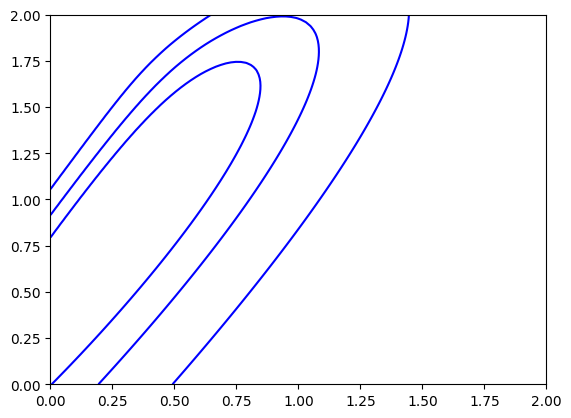

In [2]:
Om = np.linspace(0.0, 2.0, 100)
Ode = np.linspace(0.0, 2.0, 100)

i1, i2 = np.unravel_index(np.argmin(gw_chi_surface), gw_chi_surface.shape)
Om_gw, Ode_gw = Om[i1], Ode[i2]

i1, i2 = np.unravel_index(np.argmin(sgrb_chi_surface), sgrb_chi_surface.shape)
Om_sgrb, Ode_sgrb = Om[i1], Ode[i2]
print(f'Best_fit GW: Om={Om_gw:.3f}\t Ode={Ode_gw:.3f}')
print(f'Best_fit sgrb: Om={Om_sgrb:.3f}\t Ode={Ode_sgrb:.3f}')

plt.figure()
plt.contour(Om, Ode, gw_chi_surface.T, levels=[gw_min+2.3, gw_min+4.61, gw_min+9.21], colors='blue')
plt.contour(Om, Ode, sgrb_chi_surface.T, levels=[sgrb_min+2.3, sgrb_min+4.61, sgrb_min+9.21], colors='red')
plt.scatter(Om_gw, Ode_gw, c='b', label=f'GW: {Om_gw:.3f} {Ode_gw:.3f}', marker='x')
plt.scatter(Om_sgrb, Ode_sgrb, c='r', label=f'sgrb: {Om_sgrb:.3f} {Ode_sgrb:.3f}', marker='x')

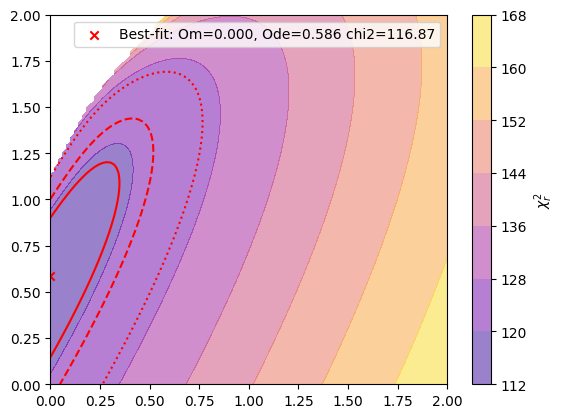

In [3]:
joint_surface = gw_chi_surface + sgrb_chi_surface
jmin = np.min(joint_surface)
i1, i2 = np.unravel_index(np.argmin(joint_surface), joint_surface.shape)
Omj, Odej = Om[i1], Ode[i2]

plt.figure()
im = plt.contourf(Om, Ode, joint_surface.T, cmap='plasma', alpha=0.5)
plt.colorbar(im, label=r'$\chi_r^2$')
plt.contour(Om, Ode, joint_surface.T, levels=[jmin+2.3, jmin+4.61, jmin+9.21], colors='red', linestyles=['solid', 'dashed', 'dotted'])
plt.scatter(Omj, Odej, c='r', marker='x', label=f'Best-fit: Om={Omj:.3f}, Ode={Odej:.3f} chi2={jmin:.2f}')
plt.legend()

/var/folders/lq/7_q5kjhn1pzgzvpl0fk8y5mc0000gp/T/ipykernel_71596/1702821117.py:2: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(Om, Ode, gw_chi_surface.T, levels=[gw_min+2.3, gw_min+4.61, gw_min+9.21], colors='cyan', linestyles=['solid', 'dashed', 'dotted'], label='GW')
/var/folders/lq/7_q5kjhn1pzgzvpl0fk8y5mc0000gp/T/ipykernel_71596/1702821117.py:3: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(Om, Ode, sgrb_chi_surface.T, levels=[sgrb_min+2.3, sgrb_min+4.61, sgrb_min+9.21], colors='deeppink', linestyles=['solid', 'dashed', 'dotted'], label='sgrb')
/var/folders/lq/7_q5kjhn1pzgzvpl0fk8y5mc0000gp/T/ipykernel_71596/1702821117.py:7: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(Om, Ode, joint_surface.T, cmap='plasma', alpha=0.8, label='sgrb+GW')
/var/folders/lq/7_q5kjhn1pzgzvpl0fk8y5mc0000gp/T/ipykernel_71596/1702821117.py:8: UserWarning: Adding colorbar to a different Figure <Figu

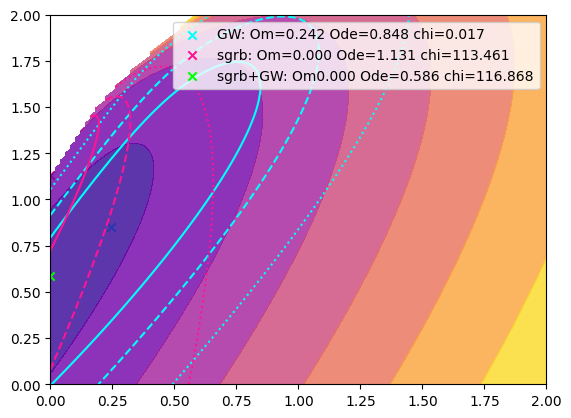

In [4]:
plt.figure()
plt.contour(Om, Ode, gw_chi_surface.T, levels=[gw_min+2.3, gw_min+4.61, gw_min+9.21], colors='cyan', linestyles=['solid', 'dashed', 'dotted'], label='GW')
plt.contour(Om, Ode, sgrb_chi_surface.T, levels=[sgrb_min+2.3, sgrb_min+4.61, sgrb_min+9.21], colors='deeppink', linestyles=['solid', 'dashed', 'dotted'], label='sgrb')
plt.scatter(Om_gw, Ode_gw, c='cyan', label=f'GW: Om={Om_gw:.3f} Ode={Ode_gw:.3f} chi={gw_min:.3f}', marker='x')
plt.scatter(Om_sgrb, Ode_sgrb, c='deeppink', label=f'sgrb: Om={Om_sgrb:.3f} Ode={Ode_sgrb:.3f} chi={sgrb_min:.3f}', marker='x')

plt.contourf(Om, Ode, joint_surface.T, cmap='plasma', alpha=0.8, label='sgrb+GW')
plt.colorbar(im, label=r'sgrb-GW $\chi_r^2$')
plt.scatter(Omj, Odej, marker='x', color='lime', label=f'sgrb+GW: Om{Omj:.3f} Ode={Odej:.3f} chi={jmin:.3f}')

plt.legend()